In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import copy

In [3]:
matfile = sio.loadmat("../data/sampleEEGdata")
EEG = matfile["EEG"][0,0]
EEG["times"] = EEG["times"][0]

In [4]:
covave = np.zeros( (int(EEG["nbchan"]),int(EEG["nbchan"])) )
for triali in range(int(EEG["trials"])):
    covave += np.cov( EEG["data"][:,:,triali] )

covave = covave / triali

covdist = np.zeros(int(EEG["trials"]))

for triali in range(int(EEG["trials"])):
    thistrialcov = np.cov( EEG["data"][:,:,triali] )
    covdist[triali] = np.sqrt( np.dot( thistrialcov.flatten(),covave.flatten()) )

covdistz = (covdist-np.mean(covdist)) / np.std(covdist)

C:\Users\kerem\AppData\Local\Temp\ipykernel_4792\4217779159.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  covave = np.zeros( (int(EEG["nbchan"]),int(EEG["nbchan"])) )
C:\Users\kerem\AppData\Local\Temp\ipykernel_4792\4217779159.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for triali in range(int(EEG["trials"])):
C:\Users\kerem\AppData\Local\Temp\ipykernel_4792\4217779159.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  covdist = np.zeros(int(EEG["tri

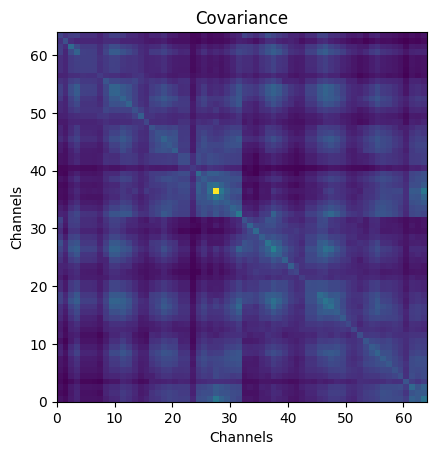

In [13]:
plt.pcolormesh(np.flipud(covave))
plt.axis("square")
plt.xlabel("Channels")
plt.ylabel("Channels")
plt.title("Covariance")

plt.show()

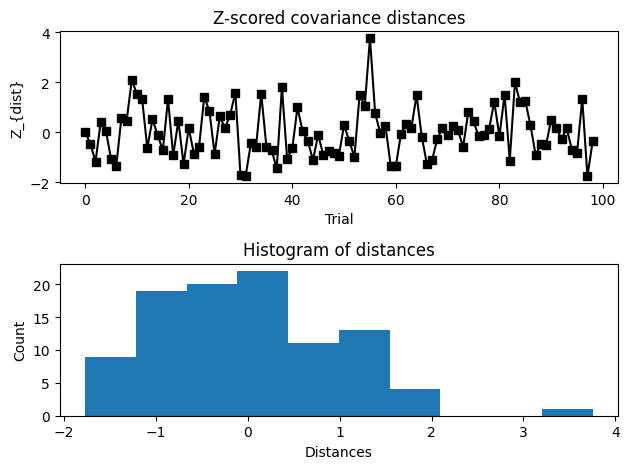

In [9]:
plt.subplot(211)
plt.plot(covdistz,"ks-")
plt.xlabel("Trial")
plt.ylabel("Z_{dist}")
plt.title("Z-scored covariance distances")

plt.subplot(212)
plt.hist(covdistz,10)
plt.xlabel("Distances")
plt.ylabel("Count")
plt.title("Histogram of distances")

plt.tight_layout()
plt.show()

In [6]:
thresh = 2.3 

toofar = covdistz>thresh

data2 = copy.deepcopy( EEG["data"] )
data2 = data2[:,:,~toofar]

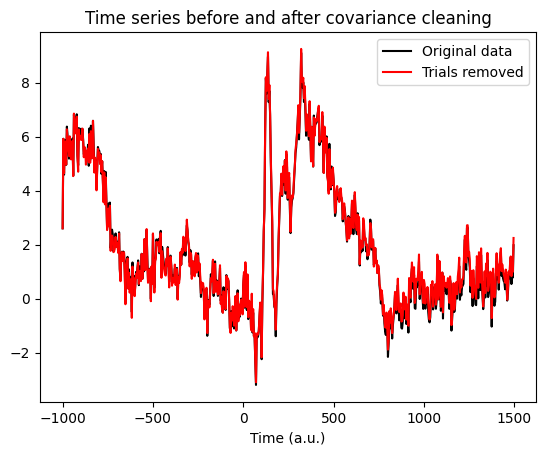

In [7]:
plt.plot(EEG["times"],np.mean(EEG["data"][30,:,:],axis=1),"k",label="Original data")
plt.plot(EEG["times"],np.mean(data2[30,:,:],axis=1),"r",label="Trials removed")
plt.xlabel("Time (a.u.)")
plt.legend()
plt.title("Time series before and after covariance cleaning")
plt.show()